In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [130]:
pip install statsmodels

In [131]:
pip install sklearn

In [132]:
import statsmodels.api as sm
from sklearn import linear_model

In [133]:
pip install seaborn

In [128]:
import seaborn as sns

In [ ]:
df = pd.read_csv('datasets/happiness.csv')
df.head(8)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


In [5]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Presentación Final
# Descripción de los datos
### La base de datos muestra a los países con los distintos valores que conforman el puntaje de lo que se le llama "Felicidad". 
### La base de Datos cuenta con 9 variables:
#### Variables Categóricas:
- 'Country or region': Indica el país o región del cual se muestran sus valores de distintas áreas

#### Variables Continuas: 
- 'Overall rank': 
Indica la posición general de los países en orden decreciente en cuanto al puntaje obtenido de la encuesta
- 'Score': 
Valor númerico que indica la ponderacion de todas las demás variables.  
- 'GDP per capita': 
Expresa la suma total del precio en el mercado de todos los bienes y servicios finales producidos por persona en cada país.
- 'Social Support': 
Indica el índice de apoyo social a estos países sobre sus ciudadanos
- 'Healthy life expectancy': 
Número que representa el índice de expectativa de vida
- 'Freedom to make life choices': 
Habla sobre la libertad de los ciudadanos para realizar decisiones de la vida 
- 'Generosity': 
Indica la generosidad de las personas en cada país
- 'Perceptions of corruption': 
Plasma un valor en cuanto a la forma en que la corrupción se muestra en los países por cada ciudadano

base de datos tomada de https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

# Pregunta de Investigación #1
# ¿Cuál es la distribución de la Esperanza de Vida y Generosidad de los países durante el 2019?

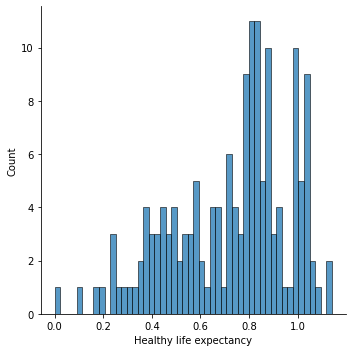

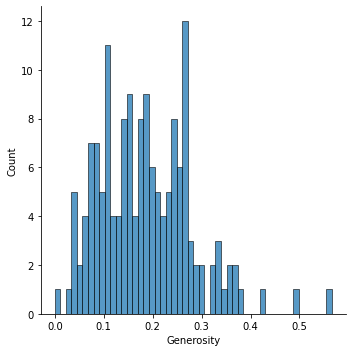

In [6]:
x = sns.displot(df['Healthy life expectancy'],
             #kde = True, #Whether to plot a gaussian kernel density estimate.
             bins = 50, #cuantas barras del histograma. Default = 10
            )
y = sns.displot(df['Generosity'],
             #kde = True, #Whether to plot a gaussian kernel density estimate.
             bins = 50, #cuantas barras del histograma. Default = 10
            )


## Esperanza de Vida:
#### La distribución de los datos presenta un sesgo a la _izquierda_ y la figura a la que más relacion presenta es a la distribución de Weibull.

## Generosidad:
#### Este histograma muestra, diferente a la Esperanza de Vida, un sesgo a la _derecha_ con un parentezco a la distribución de Weibull
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# Pregunta de Investigación #2
# ¿Existe correlación entre el puntaje de Felicidad [Score] con la [Libertad de Tomar Decisiones]?

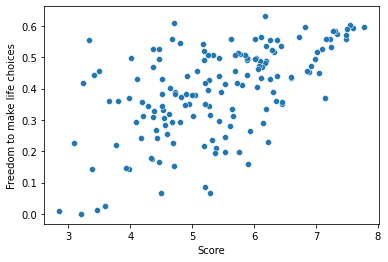

In [7]:
# Se realiza una gráfica de dispersión entre estas dos variables
sns.scatterplot(x = df['Score'],
                y = df['Freedom to make life choices'],
                data = df
               )
#sns.lmplot(x="Score", y="Freedom to make life choices", data = df);

In [8]:
from scipy import stats
stats.pearsonr(df['Score'], df['Freedom to make life choices'])

(0.5667418257199901, 1.2379243627982124e-14)

### Visto el coeficiente de Pearson (0.56) se observa una relación poco fuerte en donde no se le puede atribuir la libertad de decisión directamente a la felicidad de los países.
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# Pregunta de Investigación #3
# ¿Existe un patron de Generocidad a lo largo del ranking de los países?

Text(0.5, 1.0, 'Gráfica de Línea de Generosidad')

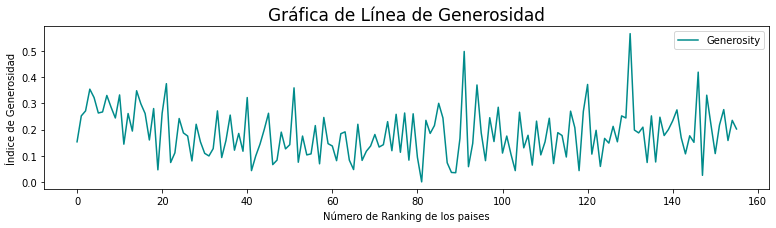

In [16]:
#df['Generosity'].plot(kind = 'line', color="darkcyan", figsize =(13,3))
df[['Generosity','Country or region']].plot(kind = 'line', color="darkcyan", figsize =(13,3))
#df[['Country or region','Generosity']].plot(kind = 'line', color="darkcyan", figsize =(13,3))

plt.xlabel('Número de Ranking de los paises')
plt.ylabel('Índice de Generosidad')

plt.title('Gráfica de Línea de Generosidad', fontsize = 17)

### Al observar cada uno de los países (ordenados por ranking general) se observa que no existe un patrón notable e inclusive países con menor puntaje presentan mayor índice de generosidad

# Pregunta de Investigación #4
# ¿Cual es el comportamiento y relación entre la felicidad de los países y el producto interno bruto por persona?

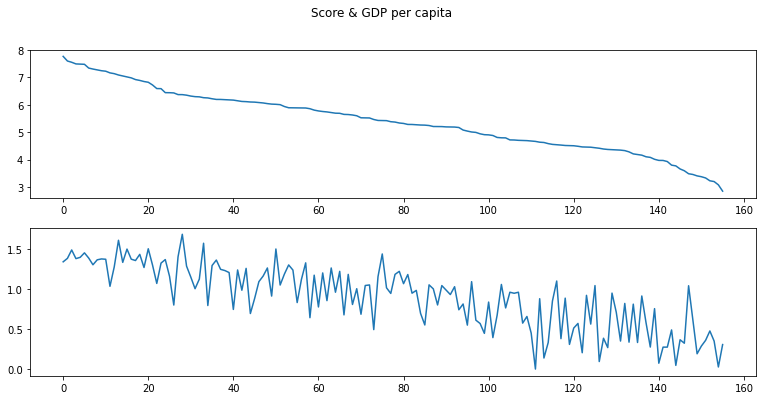

In [52]:
fig, axs = plt.subplots(2, figsize = (13,6))
fig.suptitle('Score & GDP per capita')
axs[0].plot(df['Score'])
axs[1].plot(df['GDP per capita'])

### Se puede observar un comportamiento decreciente para cada valor. Conforme se recorren los rankings de los países el producto interno bruto comienza a disminuir. Esto establece una relación lineal con la felicidad: A menor felicidad, menor producto interno bruto por persona. 

# Pregunta de Investigación #5 
# Cuáles son los top 5 países más felices y los 5 menos felices?

In [76]:
js = df.loc[:,['Country or region', 'Score']]
js.head()

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


In [98]:
top = js.sort_values(['Score'],
              ascending = False
             ).head(5)
chart1 = top.set_index('Country or region')
#top.index = top.index + 1
chart1

,Score
Country or region,
Finland,7.769
Denmark,7.600
Norway,7.554
Iceland,7.494
Netherlands,7.488


In [100]:
bottom = js.sort_values(['Score'],
              ascending = True
             ).head(5)
chart2 = bottom.set_index('Country or region')
#top.index = top.index + 1
chart2

,Score
Country or region,
South Sudan,2.853
Central African Republic,3.083
Afghanistan,3.203
Tanzania,3.231
Rwanda,3.334


Text(0, 0.5, 'Ranking de los Países')

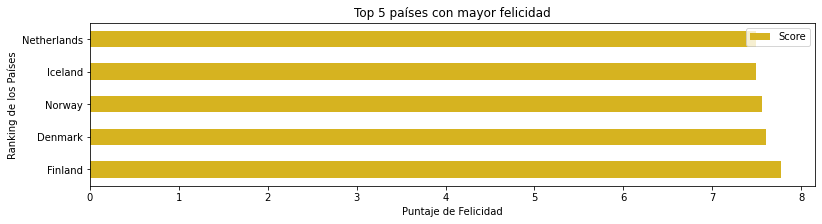

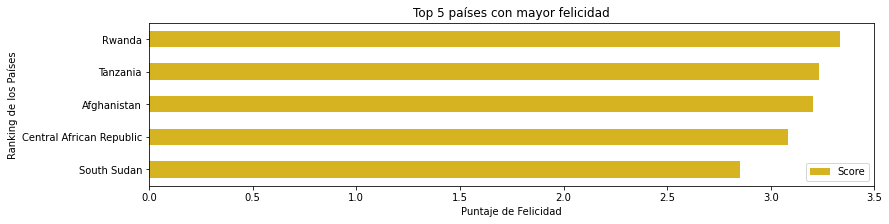

In [102]:
ax = chart.plot(kind = 'barh',
        figsize = (13,3),
         title = 'Top 5 países con mayor felicidad', 
                color = '#d6b320'
        )

ax.set_xlabel("Puntaje de Felicidad")
ax.set_ylabel("Ranking de los Países")

bx = chart2.plot(kind = 'barh',
        figsize = (13,3),
         title = 'Top 5 países con mayor felicidad', 
                color = '#d6b320'
        )

bx.set_xlabel("Puntaje de Felicidad")
bx.set_ylabel("Ranking de los Países")


In [103]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Pregunta de investigación #6
# ¿Cómo afecta el GDP, Esperanza de vida y el Soporte Social en la Felicidad del país?

In [117]:
reg = df.rename(columns = {'GDP per capita' : 'GDPpC', 'Social support': 'SocSupport', 'Healthy life expectancy': 'HLE'})
reg.head()

,Overall rank,Country or region,Score,GDPpC,SocSupport,HLE,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [119]:
modelA = sm.OLS.from_formula('Score ~ GDPpC + HLE + SocSupport', data = reg)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.43e-42
Time:                        04:02:46   Log-Likelihood:                -136.50
No. Observations:                 156   AIC:                             281.0
Df Residuals:                     152   BIC:                             293.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1350      0.212     10.088      0.000       1.717       2.553
GDPpC          0.8098      0.236      3.434      0.001       0.344       1.276
HLE            1.2977      0.366      3.544      0.001       0.574       2.021
SocSupport     1.3219      0.248      5.324      0.000       0.831       1.812
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.845
Skew:                          -0.033   Prob(JB):                        0.655
Kurtosis:                       2.646   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
x = resultA.resid

0      1.171457
1      0.973164
2      0.788710
3      0.763247
4      0.914160
         ...   
151   -0.828404
152   -1.106929
153   -0.367359
154    0.790642
155   -0.672750
Length: 156, dtype: float64

# Caso de estudio
## País con un GDP = 1.303, HEL = 1.557 Social Support = 1.026

In [126]:
print('El puntaje de Felicidad de un País "X", es de', 2.1350 + (0.8098 *1.303) + (1.2977*1.557) + (1.3219*1.026))

El puntaje de Felicidad de un País "X", es de 6.5669577


In [127]:
df.head(8)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
